In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [8]:
pd.options.display.max_columns = 500

In [9]:
meters = gpd.read_file("C:/Users/CSS/Desktop/MUSA611/final-project/ParkingMeters.geojson")
meters

,jurisdiction,collection_subroute_desc,smart_meter_flag,legislation_ref,pmr_route,parity_digit_position,latitude,ms_space_num,nfc_key,reason_code,post_id,cap_color,street_num,parking_space_id,pco_beat,collection_route,legislation_dt,objectid,longitude,street_name,collection_route_desc,collection_subroute,pm_district_id,meter_type,active_meter_flag,osp_id,on_offstreet_type,street_seg_ctrln_id,street_id,orientation,meter_vendor,meter_model,sensor_flag,ms_pay_station_id,spt_code,old_rate_area,work_order,blockface_id,comments,geometry
0,SFMTA,None,N,None,G-3,2,37.7958465991,0.0,6325,U1,500-08020,-,802.0,101400.0,210,None,None,5228201,-122.4084052012,JACKSON ST,None,None,12.0,-,U,0.0,ON,7379000.0,500.0,0.0,-,-,N,-,None,-,None,500082.0,None,POINT (-122.40839 37.79584)
1,SFMTA,Franklin 1200-1500,Y,None,D-1,2,37.7872076006,0.0,9EPC,-,419-13290,Grey,1329.0,102036.0,510,409,None,5228280,-122.4234658999,FRANKLIN ST,Franklin St: Unit - 900,409-3,15.0,SS,M,0.0,ON,5820000.0,419.0,270.0,IPS,M5,N,-,None,Area 3,None,419131.0,None,POINT (-122.42345 37.78720)
2,SFMTA,None,Y,None,M-3,2,37.7809426979,5.0,8JGP,UB,671-01050,Grey,105.0,109966.0,304-U,None,None,5229090,-122.3946234972,SOUTH PARK,None,None,2.0,MS,U,0.0,ON,12010000.0,671.0,135.0,MacKay,Elite,Y,671-01001,None,-,None,671011.0,None,POINT (-122.39461 37.78094)
3,SFMTA,None,Y,None,D-1,2,37.7895320979,0.0,6X57,U5,606-15400,Grey,1540.0,104916.0,506,None,None,5229183,-122.4217233022,PINE ST,None,None,15.0,SS,U,0.0,ON,10477000.0,606.0,0.0,IPS,M5,N,-,None,Area 3,None,606152.0,None,POINT (-122.42171 37.78953)
4,SFMTA,None,Y,None,M-2,2,37.7852988009,0.0,3NBT,U9,418-06100,Grey,610.0,107918.0,303-U,None,None,5229690,-122.3971666002,FOLSOM ST,None,None,2.0,SS,U,0.0,ON,5660000.0,418.0,315.0,IPS,M5,E,-,None,-,None,418062.0,20131003 Update,POINT (-122.39716 37.78529)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,SFMTA,Pacific St: 1600,Y,None,J-4,2,37.7774132014,5.0,2V2O,-,464-01050,Grey,105.0,114394.0,503,M-135,None,5254619,-122.4183380024,HAYES ST,Pacific St: 1600,M135-1,3.0,MS,M,0.0,ON,6813000.0,464.0,180.0,MacKay,Elite,E,464-01001,None,Area 2,None,464011.0,-,POINT (-122.41833 37.77741)
34325,PORT,Pier 52 Boat Launch,Y,None,Port 3,0,37.7700799023,23.0,6PYO,-,891-00230,Grey,601.0,111254.0,308,600,None,5261168,-122.3858515003,TERRY A FRANCOIS BLVD,Terry Francois,600-2,2.0,MS,M,891.0,OFF,12532004.0,869.0,90.0,MacKay,Elite,N,891-00001,None,Port 12,None,869051.0,None,POINT (-122.38584 37.77008)
34326,PORT,Terry Francois 700-800,Y,None,Port 3,2,37.7653593804,12.0,None,-,869-08120,Grey,812.0,139039.0,-,600,None,5261089,-122.3871421932,TERRY A FRANCOIS BLVD,Terry Francois,600-1,2.0,MS,M,0.0,ON,12532007.0,869.0,315.0,MacKay,Tango,N,869-08002,None,-,None,869082.0,None,POINT (-122.38713 37.76535)
34327,SFMTA,Mission: 100-600,Y,None,M-1,2,37.792946902,0.0,49WL,-,568-00330,Grey,33.0,127953.0,300,403,None,5256418,-122.3934099988,MISSION ST,Mission St: Unit - 1600,403-51,1.0,SS,M,0.0,ON,9083000.0,568.0,135.0,IPS,M5,Y,-,None,Area 1,None,568003.0,20131101 Update,POINT (-122.39339 37.79294)


In [4]:
meters.geometry

0        POINT (-122.40839 37.79584)
1        POINT (-122.42345 37.78720)
2        POINT (-122.39461 37.78094)
3        POINT (-122.42171 37.78953)
4        POINT (-122.39716 37.78529)
                    ...             
34324    POINT (-122.41833 37.77741)
34325    POINT (-122.38584 37.77008)
34326    POINT (-122.38713 37.76535)
34327    POINT (-122.39339 37.79294)
34328    POINT (-122.41067 37.79911)
Name: geometry, Length: 34329, dtype: geometry

<AxesSubplot:>

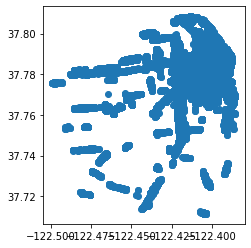

In [5]:
meters.plot()

In [14]:
neighborhood = gpd.read_file("C:/Users/CSS/Desktop/MUSA611/final-project/AnalysisNeighborhoods.geojson")

In [18]:
neighborhood.head()

,nhood,geometry
0,Bayview Hunters Point,"MULTIPOLYGON (((-122.38158 37.75307, -122.3815..."
1,Bernal Heights,"MULTIPOLYGON (((-122.40361 37.74934, -122.4037..."
2,Castro/Upper Market,"MULTIPOLYGON (((-122.42656 37.76948, -122.4269..."
3,Chinatown,"MULTIPOLYGON (((-122.40623 37.79756, -122.4055..."
4,Excelsior,"MULTIPOLYGON (((-122.42398 37.73155, -122.4239..."


<AxesSubplot:>

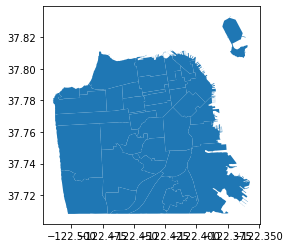

In [15]:
neighborhood.plot()

In [6]:
parkings = pd.read_csv("C:/Users/CSS/Desktop/MUSA611/final-project/SFMTA_Parking_Meter_Detailed_Revenue_Transactions.csv")

In [34]:
parkings.columns

Index(['TRANSMISSION_DATETIME', 'POST_ID', 'STREET_BLOCK', 'PAYMENT_TYPE',
       'SESSION_START_DT', 'SESSION_END_DT', 'METER_EVENT_TYPE',
       'GROSS_PAID_AMT'],
      dtype='object')

In [10]:
parkings = parkings.sample(7000)

In [11]:
len(parkings)

7000

In [12]:
parkings['POST_ID'].unique()

array(['658-01005', '819-00110', '224-29600', ..., '691-21050',
       '686-01140', '604-00130'], dtype=object)

In [16]:
meters.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
join_meters = gpd.sjoin(meters, neighborhood, op='within')
join_meters.head()

,jurisdiction,collection_subroute_desc,smart_meter_flag,legislation_ref,pmr_route,parity_digit_position,latitude,ms_space_num,nfc_key,reason_code,post_id,cap_color,street_num,parking_space_id,pco_beat,collection_route,legislation_dt,objectid,longitude,street_name,collection_route_desc,collection_subroute,pm_district_id,meter_type,active_meter_flag,osp_id,on_offstreet_type,street_seg_ctrln_id,street_id,orientation,meter_vendor,meter_model,sensor_flag,ms_pay_station_id,spt_code,old_rate_area,work_order,blockface_id,comments,geometry,index_right,nhood
0,SFMTA,None,N,None,G-3,2,37.7958465991,0.0,6325,U1,500-08020,-,802.0,101400.0,210,None,None,5228201,-122.4084052012,JACKSON ST,None,None,12.0,-,U,0.0,ON,7379000.0,500.0,0.0,-,-,N,-,None,-,None,500082.0,None,POINT (-122.40839 37.79584),3,Chinatown
7,SFMTA,None,N,None,G-3,2,37.7953905529,0.0,4STG,U3,720-06360,-,636.0,111392.0,102,None,None,5231000,-122.4048251562,WASHINGTON ST,None,None,1.0,-,U,0.0,ON,13410000.0,720.0,0.0,-,-,N,-,None,-,None,720062.0,None,POINT (-122.40482 37.79539),3,Chinatown
98,SFMTA,Jackson: Unit - 800,Y,None,G-3,2,37.7959212986,0.0,7BT9,UY,500-07150,Grey,715.0,106366.0,209,207,None,5229760,-122.4071447027,JACKSON ST,Jackson St: Unit - 800,207-1,12.0,SS,T,0.0,ON,7374000.0,500.0,180.0,IPS,M5,N,-,None,Area 2,None,500071.0,None,POINT (-122.40713 37.79592),3,Chinatown
105,SFMTA,California: Unit - 700,Y,None,I-4,2,37.7924442002,0.0,8DL8,-,350-07180,Grey,718.0,114782.0,207,210,None,5233407,-122.4065802989,CALIFORNIA ST,California: Unit - 900 Pine St,210-2,12.0,SS,M,0.0,ON,3534000.0,350.0,0.0,IPS,M5,N,-,None,Area 2,None,350072.0,None,POINT (-122.40657 37.79244),3,Chinatown
109,SFMTA,Kearny St: Unit - 500,Y,None,I-4,2,37.7933162981,19.0,28UM,-,520-05190,Yellow,519.0,129082.0,101,M-204,None,5239463,-122.4046444983,KEARNY ST,Kearny St: Grant Ave,M204-1,1.0,MS,M,0.0,ON,7755000.0,520.0,270.0,MacKay,Elite,N,520-05003,None,Area 1,None,520051.0,None,POINT (-122.40463 37.79331),3,Chinatown


In [22]:
len(join_meters)

34329

In [24]:
meter_index = join_meters[['post_id', 'nhood']]
meter_index 

,post_id,nhood
0,500-08020,Chinatown
7,720-06360,Chinatown
98,500-07150,Chinatown
105,350-07180,Chinatown
109,520-05190,Chinatown
...,...,...
28734,669-07750,Golden Gate Park
29316,669-07670,Golden Gate Park
30611,669-07770,Golden Gate Park
31473,669-07570,Golden Gate Park


In [28]:
meter_index  = meter_index.merge(neighborhood, left_on='nhood', right_on='nhood')

In [33]:
meter_index.head()

,post_id,nhood,geometry
0,500-08020,Chinatown,"MULTIPOLYGON (((-122.40623 37.79756, -122.4055..."
1,720-06360,Chinatown,"MULTIPOLYGON (((-122.40623 37.79756, -122.4055..."
2,500-07150,Chinatown,"MULTIPOLYGON (((-122.40623 37.79756, -122.4055..."
3,350-07180,Chinatown,"MULTIPOLYGON (((-122.40623 37.79756, -122.4055..."
4,520-05190,Chinatown,"MULTIPOLYGON (((-122.40623 37.79756, -122.4055..."


In [35]:
parking_nhood = parkings[['TRANSMISSION_DATETIME', 'POST_ID', 'STREET_BLOCK', 'PAYMENT_TYPE',
       'SESSION_START_DT', 'SESSION_END_DT']].merge(meter_index, left_on='POST_ID', right_on='post_id')

In [39]:
parking_nhood.head()

,TRANSMISSION_DATETIME,POST_ID,STREET_BLOCK,PAYMENT_TYPE,SESSION_START_DT,SESSION_END_DT,post_id,nhood,geometry
0,226824835_4_04012022181346,819-00110,BROADWAY 0,CREDIT CARD,2022/04/01 06:13:46 PM,2022/04/01 07:48:13 PM,819-00110,Financial District/South Beach,"MULTIPOLYGON (((-122.38753 37.78280, -122.3875..."
1,226825205_4_04012022191246,819-00110,BROADWAY 0,CASH,2022/04/01 07:12:46 PM,2022/04/01 08:30:13 PM,819-00110,Financial District/South Beach,"MULTIPOLYGON (((-122.38753 37.78280, -122.3875..."
2,226802012_4_04012022140826,224-29600,24TH ST 2900,CASH,2022/04/01 02:08:26 PM,2022/04/01 03:49:42 PM,224-29600,Mission,"MULTIPOLYGON (((-122.41096 37.76943, -122.4109..."
3,226817213_4_04012022163200,224-29600,24TH ST 2900,CREDIT CARD,2022/04/01 04:32:00 PM,2022/04/01 06:00:00 PM,224-29600,Mission,"MULTIPOLYGON (((-122.41096 37.76943, -122.4109..."
4,226819430_4_04012022165346,570-01080,MINNA ST 100,CREDIT CARD,2022/04/01 04:53:46 PM,2022/04/01 05:53:46 PM,570-01080,Financial District/South Beach,"MULTIPOLYGON (((-122.38753 37.78280, -122.3875..."


In [40]:
count0401 = parking_nhood.groupby('nhood').count().reset_index()

In [44]:
count0401['date'] = '2022-04-01'
count0401 = count0401[['nhood', 'date', 'post_id']]
count0401

C:\Users\CSS\AppData\Local\Temp/ipykernel_22372/1106030560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count0401['date'] = '2022-04-01'


,nhood,date,post_id
0,Bayview Hunters Point,2022-04-01,2
1,Bernal Heights,2022-04-01,108
2,Castro/Upper Market,2022-04-01,116
3,Chinatown,2022-04-01,245
4,Excelsior,2022-04-01,101
5,Financial District/South Beach,2022-04-01,561
6,Glen Park,2022-04-01,20
7,Golden Gate Park,2022-04-01,3
8,Haight Ashbury,2022-04-01,109
9,Hayes Valley,2022-04-01,202


In [45]:
count0401_geom = count0401.merge(neighborhood, left_on='nhood', right_on='nhood')
count0401_geom

,nhood,date,post_id,geometry
0,Bayview Hunters Point,2022-04-01,2,"MULTIPOLYGON (((-122.38158 37.75307, -122.3815..."
1,Bernal Heights,2022-04-01,108,"MULTIPOLYGON (((-122.40361 37.74934, -122.4037..."
2,Castro/Upper Market,2022-04-01,116,"MULTIPOLYGON (((-122.42656 37.76948, -122.4269..."
3,Chinatown,2022-04-01,245,"MULTIPOLYGON (((-122.40623 37.79756, -122.4055..."
4,Excelsior,2022-04-01,101,"MULTIPOLYGON (((-122.42398 37.73155, -122.4239..."
5,Financial District/South Beach,2022-04-01,561,"MULTIPOLYGON (((-122.38753 37.78280, -122.3875..."
6,Glen Park,2022-04-01,20,"MULTIPOLYGON (((-122.44738 37.74648, -122.4472..."
7,Golden Gate Park,2022-04-01,3,"MULTIPOLYGON (((-122.44092 37.77363, -122.4407..."
8,Haight Ashbury,2022-04-01,109,"MULTIPOLYGON (((-122.43200 37.77143, -122.4319..."
9,Hayes Valley,2022-04-01,202,"MULTIPOLYGON (((-122.42081 37.77400, -122.4210..."


<AxesSubplot:>

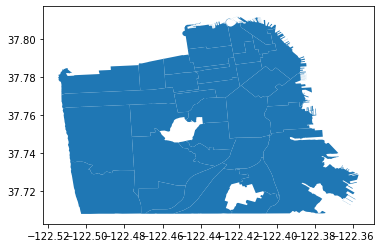

In [53]:
count0401_geom.plot()

In [52]:
count0401_geom = gpd.GeoDataFrame(count0401_geom, geometry=count0401_geom.geometry)

In [57]:
count0401_geom.to_file("C:/Users/CSS/Desktop/MUSA611/final-project/count0401.geojson", driver="GeoJSON")

In [69]:
df = pd.read_json("https://data.sfgov.org/resource/imvp-dq3v.json?$where=session_start_dt between '2021-07-16T00:00:00' and '2021-08-27T00:00:00'")

InvalidURL: URL can't contain control characters. "/resource/imvp-dq3v.json?$where=session_start_dt between '2021-07-16T00:00:00' and '2021-08-27T00:00:00'" (found at least ' ')

In [68]:
df

,transmission_datetime,post_id,street_block,payment_type,session_start_dt,session_end_dt,meter_event_type,gross_paid_amt
0,7.392619e+23,549-20170,LOMBARD ST 2000,PAY BY CELL,2021-06-09T14:23:00.000,2021-06-09T14:53:00.000,NS,0.88
1,7.392619e+23,691-18310,UNION ST 1800,PAY BY CELL,2021-06-09T14:23:00.000,2021-06-09T14:28:00.000,NS,0.38
2,7.392619e+23,606-05020,PINE ST 500,PAY BY CELL,2021-06-09T14:23:00.000,2021-06-09T15:00:00.000,NS,2.31
3,7.392619e+23,340-00043,BLUXOME ST 0,PAY BY CELL,2021-06-09T14:23:00.000,2021-06-09T14:53:00.000,NS,1.38
4,7.392619e+23,909-00001,18th and Geary Lot,PAY BY CELL,2021-06-09T14:23:00.000,2021-06-09T14:38:00.000,NS,0.56
...,...,...,...,...,...,...,...,...
995,7.392757e+23,607-32130,PIERCE ST 3200,PAY BY CELL,2021-06-09T15:19:00.000,2021-06-09T15:34:00.000,NS,2.06
996,7.392758e+23,350-35390,CALIFORNIA ST 3500,PAY BY CELL,2021-06-09T15:19:00.000,2021-06-09T15:49:00.000,NS,1.12
997,7.392758e+23,472-06180,HYDE ST 600,PAY BY CELL,2021-06-09T15:22:19.000,2021-06-09T16:07:19.000,AT,1.69
998,7.392759e+23,502-07270,JONES ST 700,PAY BY CELL,2021-06-09T15:20:00.000,2021-06-09T17:20:00.000,NS,6.50
